<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo I: Medidas de Distancia y Similitud. </font> </center>



## Introducción

Ya que se tiene determinado el tipo de dato a utilizar, se pueden realizar una medida de similitud
proponiendo el índice adecuado apropiado. 

>La primera y más importante es evitar la combinación de datos, esto debido a que cada tipo de dato presenta características propias que no comparten con los de otra naturaleza.

>Un índice de similitud $\delta_{i,j}$ es una medida de que tan parecido es un dato $i$ con otro $j$. Generalmente, las similaridades están acotadas en el rango de cero a uno; un aumento en la similaridad implica un aumento de la semejanza entre datos o variables, y toda similaridad de un dato consigo mismo debería ser igual al máximo valor posible, es decir, uno.

>Las distancias en cambio disminuyen con un aumento del parecido, no son negativas y la distancia de un elemento consigo mismo es cero. Tanto las matrices de similaridades como las de distancias son simétricas; es decir, la distancia entre el individuo `a` y el `b` es la misma que entre el `b` y el `a`.

>Dependiendo del método elegido para la ordenación, la clasificación, o el cálculo de índices de diversidad, así como de la escala de medición de los rasgos funcionales, la asociación entre los datos se expresará en términos de similaridad o distancia. Sin embargo, las similaridades pueden transformarse en distancias y viceversa.

Para el rango cero-uno, la similaridad $\delta_{i,j}$ puede ser transformada a distancia $d_{i,j}$ de la siguientes
formas:

$$d_{i,j} = 1 - \delta_{i,j}$$

$$d_{i,j} = \sqrt{1-\delta_{i,j}}$$

$$d_{i,j} = \sqrt{\delta_{i,j} -2\delta_{i,j} + \delta_{i,j}}$$

$$d_{i,j} = -\log{(\delta_{i,j})}$$

>El uso de índices de diversidad funcional basados en distancias, así como los métodos de
clasificación y/o de ordenación requiere una comprensión de las propiedades de la escala de
medición de los rasgos funcionales de las especies, y de las características de las medidas de
semejanza asociadas a cada tipo de datos.

## Similitud en Datos de Doble Estado o Binarios

Cuando la matriz de datos $X$, proviene de la observación de $n$ atributos que toman el valor 0 si la característica está ausente y el valor 1 si está presente, la información del grado de asociación entre cualquier par de individuos y puede representarse como una tabla de contingencia de 2x2 conocida conmunmente como **Matriz de Confusión**.

|             |               |               |$Muestra_j$   |         |
|:-----------:| ------------- |:-------------:|:------------:|:-------:|
|             |               |**Presente(1)**|**Ausente(0)**|         |
|             |**Presente(1)**|        a      |       b      |`a+b`    |
|$Muestra_i$  |**Ausente(0)** |        c      |       d      |`c+d`    |
|             |               |      `a+c`    |     `b+d`    |`a+b+c+d`|     

Donde $a$ es el número de caracteres presentes comunes, $b$ es el número de caracteres presente en
$i$ pero no en $j$, $c$ es el número de caracteres presentes en $j$ pero no presentes en $i$ y d es número
de caracteres no presentes en ambos datos. Para la matriz $X$ de dimensión $m × n$, es posible crear
o construir $\frac{n(n−1)}{2}$ Matrices de Confusión. 

Se han propuesto diversas medidas de similaridad que verifican estas propiedades, entre otros, Jaccard (1908), Rusell y Rao (1940), Sorensen (1948) y Sokal y Michener (1958). Sin embargo, existen similitudes que no verifican las propiedades de simetría y rango tales como la de Kulczynski (1970) acotada en el rango $[0,“ )$ y otros que expresan dependencia estocástica entre $x_i$ y $x_j$ como son las de Yule (1912) y la de Pearson (1926), acotadas en el rango $(-1,1)$, donde la mayor disimilaridad corresponde a $-1$, la similaridad total a $1$ y el valor 0 se asocia a la independencia estocástica.

> No existe un criterio universal de cuándo usar una u otra similitud. Los diferentes autores que han abordado el tema coinciden en que la elección de una determinada similitud dependerá del peso que se desea dar a las frecuencias de $a$, $b$, $c$ y $d$, del tipo de datos que se quieran representar y de la situación experimental (Legendre y Legendre 1979, Gower y Legendre 1986).

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Emparejamiento simple| $\frac{a+d}{a+b+c+d}$                      |si         |[0,1]        |
|Rogers y Tanimoto    | $\frac{a+d}{a+2b+2c+d}$                    |si         |[0,1]        |
|Hamman               | $\frac{(a+d)-(b+c)}{a+2b+2c+d}$            |si         |[-1,1]      |
|Yule                 | $\frac{ad-bc}{ad+bc}$                      |si         |[-1,1]       |
|Pearson              | $\frac{ad-bc}{\sqrt((a+c)(b+d)(a+b)(c+d))}$|si         |[-1,1]       |
|Jaccard              | $\frac{b+c}{a+b+c}$                        |No         |[0,1]        |
|Russel y Rao         | $\frac{a}{a+b+c+d}$                        |No         |[0,1]        |




No hay que olvidar que cada índice de similitud tiene propiedades distintas por lo que hay que
considerar el objetivo que se quiere obtener para elegir el índice adecuado.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
y_i = [0,1,0,1,0,0]
y_j = [1,1,1,0,0,0]

In [3]:
M = np.array([[1,1],
     [2,2]])

In [4]:
M

array([[1, 1],
       [2, 2]])

In [5]:
m = confusion_matrix(y_i,y_j)
m

array([[2, 2],
       [1, 1]], dtype=int64)

In [6]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [7]:
d = m[0,0]
c = m[0,1]
b = m[1,0]
a = m[1,1]

In [8]:
#indice de similitud de emparejamiento simple
simple = (a+d)/(a+b+c+d)
simple

0.5

In [9]:
#indice de similitud de jaccard
jac = (b+c)/(a+b+c)
jac

0.75

In [10]:
from scipy.spatial.distance import jaccard


In [11]:
jaccard(y_i,y_j)

0.75

## Similitud en Datos multi estado Nominales 

Si las categorías para cada variable son codificadas por ejemplo, como: $0,1, 2, 3, . . . , k,$ el grado de
asociación entre cualquier par de individuos $x_i$ y $x_j$ puede medirse a través de la expansión del
emparejamiento simple que se expresará como:

$$d_{ij}=\frac{número\_de\_caracteres\_coincidentes}{número\_total\_de\_caracteres}$$

No obstante, cuando el cero representa ausencia del carácter es recomendable ignorar el empate
de ceros en forma similar como lo hace `Jaccard`.

Para el tratamiento de las variables ‘indicadoras excluyentes’ pueden utilizarse dos estrategias: 

>Uso de variables `‘auxiliares’` (dummy) o desdoblamiento en tantas variables como estados posibles presentes de la categoría.

En el caso de variables ‘auxiliares’ cada variable estará representada por tantas pseudo variables como número de estados diferentes menos uno. 

Así cada categoría tendrá asociado un perfil con un 1 en el estado en que se encuentre, estando el último estado representado solo por ceros.

>Cuando se realiza el desdoblamiento de una variable nominal en todos sus posibles estados, se
identifica la presencia o ausencia de cada estado del rasgo funcional en estudio, pero como estos
estados son excluyentes cada especie tendrá un solo valor de presencia (1) y el resto serán ceros.

In [12]:
data = {'Genero':['M','F','F','M','F','F','F'],
       'Nombre' : ['John', 'Camila', 'Renata', 'José', 'Alex', 'Pau', 'Fernanda'],
       'Estatus Marital': ['Casado','Soltero','Divorciado', 'Soltero','Divorciado','Soltero','Divorciado']}
data

{'Genero': ['M', 'F', 'F', 'M', 'F', 'F', 'F'],
 'Nombre': ['John', 'Camila', 'Renata', 'José', 'Alex', 'Pau', 'Fernanda'],
 'Estatus Marital': ['Casado',
  'Soltero',
  'Divorciado',
  'Soltero',
  'Divorciado',
  'Soltero',
  'Divorciado']}

In [13]:
df = pd.DataFrame(data)
df

,Genero,Nombre,Estatus Marital
0,M,John,Casado
1,F,Camila,Soltero
2,F,Renata,Divorciado
3,M,José,Soltero
4,F,Alex,Divorciado
5,F,Pau,Soltero
6,F,Fernanda,Divorciado


In [14]:
help(df.set_index)

Help on method set_index in module pandas.core.frame:

set_index(keys, drop: 'bool' = True, append: 'bool' = False, inplace: 'bool' = False, verify_integrity: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Set the DataFrame index using existing columns.
    
    Set the DataFrame index (row labels) using one or more existing
    columns or arrays (of the correct length). The index can replace the
    existing index or expand on it.
    
    Parameters
    ----------
    keys : label or array-like or list of labels/arrays
        This parameter can be either a single column key, a single array of
        the same length as the calling DataFrame, or a list containing an
        arbitrary combination of column keys and arrays. Here, "array"
        encompasses :class:`Series`, :class:`Index`, ``np.ndarray``, and
        instances of :class:`~collections.abc.Iterator`.
    drop : bool, default True
        Delete columns to be used as the new index.
    append : bool, d

In [15]:
df.set_index('Nombre', inplace =True)

In [16]:
df

,Genero,Estatus Marital
Nombre,,
John,M,Casado
Camila,F,Soltero
Renata,F,Divorciado
José,M,Soltero
Alex,F,Divorciado
Pau,F,Soltero
Fernanda,F,Divorciado


In [17]:
df['Genero'].unique()

array(['M', 'F'], dtype=object)

In [18]:
df['Estatus Marital'].unique()

array(['Casado', 'Soltero', 'Divorciado'], dtype=object)

In [19]:
# Variables auxiliares (dummies) para Genero
df_genero = pd.get_dummies(df['Genero'], prefix = 'Genero' )
df_genero

,Genero_F,Genero_M
Nombre,,
John,0,1
Camila,1,0
Renata,1,0
José,0,1
Alex,1,0
Pau,1,0
Fernanda,1,0


In [20]:
# Variables auxiliares (dummies) para Estatus Marital
df_marital = pd.get_dummies(df['Estatus Marital'], prefix = 'Marital' )
df_marital

,Marital_Casado,Marital_Divorciado,Marital_Soltero
Nombre,,,
John,1,0,0
Camila,0,0,1
Renata,0,1,0
José,0,0,1
Alex,0,1,0
Pau,0,0,1
Fernanda,0,1,0


In [21]:
df

,Genero,Estatus Marital
Nombre,,
John,M,Casado
Camila,F,Soltero
Renata,F,Divorciado
José,M,Soltero
Alex,F,Divorciado
Pau,F,Soltero
Fernanda,F,Divorciado


In [22]:
df_dummy = df_genero.join(df_marital)
df_dummy

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero
Nombre,,,,,
John,0,1,1,0,0
Camila,1,0,0,0,1
Renata,1,0,0,1,0
José,0,1,0,0,1
Alex,1,0,0,1,0
Pau,1,0,0,0,1
Fernanda,1,0,0,1,0


In [23]:
y_i = df_dummy.loc['John'].values
y_i


array([0, 1, 1, 0, 0], dtype=uint8)

In [24]:
y_j= df_dummy.loc['John'].values
y_j

array([0, 1, 1, 0, 0], dtype=uint8)

In [25]:
jaccard(y_i, y_j)

0.0

In [26]:
df_dummy.index.to_list()

['John', 'Camila', 'Renata', 'José', 'Alex', 'Pau', 'Fernanda']

In [27]:
#Obtención de la similitud de todo el conjunto de datos (lista)
similaridad_df = []
for i_ind in df_dummy.index.to_list():
    for j_ind in df_dummy.index.to_list():
        y_i = df_dummy.loc[i_ind].values
        y_j= df_dummy.loc[j_ind].values
        
        similaridad_df.append(jaccard(y_i, y_j))
        

In [28]:
similaridad_array = np.array(similaridad_df)
similaridad_array = similaridad_array.reshape(7,7)

In [29]:
len(similaridad_df)

49

In [30]:
similaridad_df = pd.DataFrame(index = df_dummy.index.to_list(), columns=df_dummy.index.to_list())
similaridad_df

,John,Camila,Renata,José,Alex,Pau,Fernanda
John,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Camila,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renata,NaN,NaN,NaN,NaN,NaN,NaN,NaN
José,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pau,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fernanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def emp_simple(yi,yj):
    
    mc = confusion_matrix(yi,yj)
    d = mc[0,0]
    c = mc[0,1]
    b = mc[1,0]
    a = mc[1,1]
    
  
    return (a+d)/(a+b+c+d)

In [32]:
def emp_jaccard(yi,yj):
    
    mc = confusion_matrix(yi,yj)
    d = mc[0,0]
    c = mc[0,1]
    b = mc[1,0]
    a = mc[1,1]
    
  
    return (b+c)/(a+b+c)

In [33]:
y_i

array([1, 0, 0, 1, 0], dtype=uint8)

In [34]:
y_j

array([1, 0, 0, 1, 0], dtype=uint8)

In [35]:
emp_simple(y_i,y_j)

1.0

In [36]:
emp_jaccard(y_i,y_j)

0.0

In [37]:
similaridad_df = pd.DataFrame(index = df_dummy.index.to_list(), columns=df_dummy.index.to_list(), dtype=float)
for i_ind in df_dummy.index.to_list():
    for j_ind in df_dummy.index.to_list():
        y_i = df_dummy.loc[i_ind].values
        y_j= df_dummy.loc[j_ind].values

        #similaridad_df.loc[i_ind,j_ind]=emp_jaccard(y_i, y_j)
        similaridad_df.loc[i_ind,j_ind]=emp_simple(y_i, y_j).astype(float)
        
        

In [38]:
similaridad_df

,John,Camila,Renata,José,Alex,Pau,Fernanda
John,1.0,0.2,0.2,0.6,0.2,0.2,0.2
Camila,0.2,1.0,0.6,0.6,0.6,1.0,0.6
Renata,0.2,0.6,1.0,0.2,1.0,0.6,1.0
José,0.6,0.6,0.2,1.0,0.2,0.6,0.2
Alex,0.2,0.6,1.0,0.2,1.0,0.6,1.0
Pau,0.2,1.0,0.6,0.6,0.6,1.0,0.6
Fernanda,0.2,0.6,1.0,0.2,1.0,0.6,1.0


In [39]:
similaridad_df.values

array([[1. , 0.2, 0.2, 0.6, 0.2, 0.2, 0.2],
       [0.2, 1. , 0.6, 0.6, 0.6, 1. , 0.6],
       [0.2, 0.6, 1. , 0.2, 1. , 0.6, 1. ],
       [0.6, 0.6, 0.2, 1. , 0.2, 0.6, 0.2],
       [0.2, 0.6, 1. , 0.2, 1. , 0.6, 1. ],
       [0.2, 1. , 0.6, 0.6, 0.6, 1. , 0.6],
       [0.2, 0.6, 1. , 0.2, 1. , 0.6, 1. ]])

In [40]:
import seaborn as sns
from matplotlib import pyplot as plt

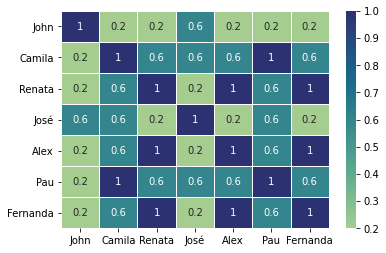

In [41]:
sns.heatmap(similaridad_df, annot=True, linewidth=.5,  cmap="crest");

## Similitud en Datos Multi Estado Ordinales 


Las variables ordinales pueden considerarse como variables cuantitativas si la asignación del ranking refleja en cierta forma una diferencia entre los estados de la variable. Por
ejemplo, si se considera la resistencia al fuego de un conjunto de muestras usando las categorías:
`muy baja`, `baja`, `media`, `alta` y `muy alta`; puede ser razonable asignarle valores: 0, 1, 2, 3, 4,
respectivamente ya que las categorías consecutivas pueden considerarse como equidistantes. De
esta manera, la nueva variable numérica podría ser tratada como una variable cuantitativa. 

In [42]:
data = {'Genero':['M','F','F','M','F','F','F'],
       'Nombre' : ['John', 'Camila', 'Renata', 'José', 'Alex', 'Pau', 'Fernanda'],
       'Estatus Marital': ['Casado','Soltero','Divorciado', 'Soltero','Divorciado','Soltero','Divorciado'],
       'Educación':['Primaria', 'Terciaria','Primaria','Secundaria','Terciaria','Secundaria','Primaria'] }
data

{'Genero': ['M', 'F', 'F', 'M', 'F', 'F', 'F'],
 'Nombre': ['John', 'Camila', 'Renata', 'José', 'Alex', 'Pau', 'Fernanda'],
 'Estatus Marital': ['Casado',
  'Soltero',
  'Divorciado',
  'Soltero',
  'Divorciado',
  'Soltero',
  'Divorciado'],
 'Educación': ['Primaria',
  'Terciaria',
  'Primaria',
  'Secundaria',
  'Terciaria',
  'Secundaria',
  'Primaria']}

In [43]:
df_data = pd.DataFrame(data)
df_data

,Genero,Nombre,Estatus Marital,Educación
0,M,John,Casado,Primaria
1,F,Camila,Soltero,Terciaria
2,F,Renata,Divorciado,Primaria
3,M,José,Soltero,Secundaria
4,F,Alex,Divorciado,Terciaria
5,F,Pau,Soltero,Secundaria
6,F,Fernanda,Divorciado,Primaria


In [44]:
df_data.set_index('Nombre', inplace =True)
df_data

,Genero,Estatus Marital,Educación
Nombre,,,
John,M,Casado,Primaria
Camila,F,Soltero,Terciaria
Renata,F,Divorciado,Primaria
José,M,Soltero,Secundaria
Alex,F,Divorciado,Terciaria
Pau,F,Soltero,Secundaria
Fernanda,F,Divorciado,Primaria


In [45]:
df_edu = df_data[['Educación']]
df_edu

,Educación
Nombre,
John,Primaria
Camila,Terciaria
Renata,Primaria
José,Secundaria
Alex,Terciaria
Pau,Secundaria
Fernanda,Primaria


In [46]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, John to Fernanda
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Educación  7 non-null      object
dtypes: object(1)
memory usage: 112.0+ bytes


In [47]:
df_edu = df_edu.astype('category')
df_edu

,Educación
Nombre,
John,Primaria
Camila,Terciaria
Renata,Primaria
José,Secundaria
Alex,Terciaria
Pau,Secundaria
Fernanda,Primaria


In [48]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, John to Fernanda
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Educación  7 non-null      category
dtypes: category(1)
memory usage: 195.0+ bytes


In [49]:
df_edu['Educación'].cat.codes

Nombre
John        0
Camila      2
Renata      0
José        1
Alex        2
Pau         1
Fernanda    0
dtype: int8

In [50]:
df_edu['Educación_codes'] = df_edu['Educación'].cat.codes
df_edu

,Educación,Educación_codes
Nombre,,
John,Primaria,0
Camila,Terciaria,2
Renata,Primaria,0
José,Secundaria,1
Alex,Terciaria,2
Pau,Secundaria,1
Fernanda,Primaria,0


In [51]:
# Variables auxiliares de las categorías Nominales
df_dummy

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero
Nombre,,,,,
John,0,1,1,0,0
Camila,1,0,0,0,1
Renata,1,0,0,1,0
José,0,1,0,0,1
Alex,1,0,0,1,0
Pau,1,0,0,0,1
Fernanda,1,0,0,1,0


In [52]:
# Variables convertidas a numéricas de mi categoría ordinal
df_edu[['Educación_codes']]

,Educación_codes
Nombre,
John,0
Camila,2
Renata,0
José,1
Alex,2
Pau,1
Fernanda,0


In [53]:
df_num = df_dummy.join(df_edu[['Educación_codes']])

In [54]:
df_num

,Genero_F,Genero_M,Marital_Casado,Marital_Divorciado,Marital_Soltero,Educación_codes
Nombre,,,,,,
John,0,1,1,0,0,0
Camila,1,0,0,0,1,2
Renata,1,0,0,1,0,0
José,0,1,0,0,1,1
Alex,1,0,0,1,0,2
Pau,1,0,0,0,1,1
Fernanda,1,0,0,1,0,0


## Similitud en datos cuantitativos

Generalizando para $m$ muestras y $n$ variables aleatorias cuantitativas (rasgos funcionales), la
distancia usual que se observa entre el par de unidades $x_i$ y $x_j$ cuando se representan en el espacio
de coordenadas definido por n variables cuantitativas, es conocida como distancia Euclideana:

$$d_{i,j} = \sqrt{\sum_{t=1}^n (x_{it} - x_{jt})^2}$$

donde $n$ son los rasgos funcionales. La distancia Euclídeana es la más conocida, la de mayor uso y
es la herramienta fundamental de cálculo de la mayoría de los métodos multivariados basados en
distancias. 

Sin embargo, presenta varios inconvenientes: 

>no está acotada, es sensible a cambios de
escalas y considera las n variables estocásticamente independientes.

Se han propuesto varias transformaciones que permiten minimizar y/o eliminar estos inconvenientes, entre otras: 

>se recomienda utilizarla en caso de homogeneidad entre la naturaleza física de las variables, cuando esto no es posible se puede estandarizar cada variable por su rango $r_t$ asegurando que la contribución de cualquier variable estará acotada en el intervalo (0,1).

Además puede dividirse por la cantidad de variables obteniendo una distancia media que oscilará en este
rango y facilita su conversión a similaridad, la expresión estará definida por:

$$d_{i,j} = \sqrt{\frac{1}{n} \sum_{t=1}^n \frac{(x_{it} - x_{jt})^2}{r_t}}$$

A continuación se presenta la formulación y propiedades de las distancias y disimilaridades no
negativas más utilizadas en los estudios de iversidad. Las más usadas son las distancias: Euclídea, Manhattan y Mahalanobis.

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Euclideana| $\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^2}$                      |si         |[0,$\infty$]        |
|Manhattan    | $ \sum_{t=1}^n |x_{it} - x_{jt}|$                  |si         |[0,$\infty$]        |
|Bray-Curtis               | $\frac{ \sum_{t=1}^n |x_{it} - x_{jt}|}{ \sum_{t=1}^n (x_{it} + x_{jt})}$            |si         |[0,$\infty$]      |
|Canberra                 | $\sum_{t=1}^n\frac{ |x_{it} - x_{jt}|}{(|x_{it}| + |x_{jt}|)}$                       |si         |[0,$\infty$]       |
|Minkowski              | $^p\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^p}$ |si         |[0,$\infty$]        |
|Mihalanobis              | $\sqrt{ \sum_{l=1}^n\sum_{t=1}^n (x_{it} - x_{jt}) \sigma_{lt}^{-1}(x_{il} - x_{jl})}$                       |si         |[0,$\infty$]        |




In [55]:
import scipy.spatial.distance as sc

### Ejemplo:


In [56]:
x = np.array([[2,3],
              [20,30],
              [-2,3],
              [2,-3]])
x

array([[ 2,  3],
       [20, 30],
       [-2,  3],
       [ 2, -3]])

In [57]:
df_x = pd.DataFrame(x,columns=['x1','x2'])
df_x

,x1,x2
0,2,3
1,20,30
2,-2,3
3,2,-3


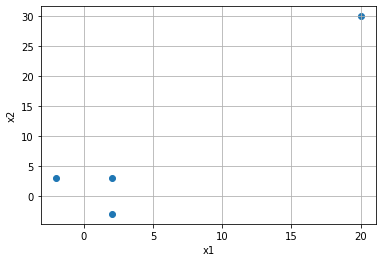

In [58]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [59]:
D1 = sc.pdist(x,'euclidean')
D1

array([32.44996148,  4.        ,  6.        , 34.82814953, 37.58989226,
        7.21110255])

In [60]:
D1.shape

(6,)

In [61]:
D1 = sc.squareform(D1)
D1

array([[ 0.        , 32.44996148,  4.        ,  6.        ],
       [32.44996148,  0.        , 34.82814953, 37.58989226],
       [ 4.        , 34.82814953,  0.        ,  7.21110255],
       [ 6.        , 37.58989226,  7.21110255,  0.        ]])

In [62]:
D1 = pd.DataFrame(D1)
D1

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [63]:
sc.pdist(df_x.values,'euclidean')

array([32.44996148,  4.        ,  6.        , 34.82814953, 37.58989226,
        7.21110255])

In [64]:
sc.squareform(sc.pdist(df_x.values,'euclidean'))

array([[ 0.        , 32.44996148,  4.        ,  6.        ],
       [32.44996148,  0.        , 34.82814953, 37.58989226],
       [ 4.        , 34.82814953,  0.        ,  7.21110255],
       [ 6.        , 37.58989226,  7.21110255,  0.        ]])

In [65]:
def pdistance_matrix(df, metric):
    '''
    Este método obtiene la matriz de distancias de df apartir de la métrica dada en el argumento de entrada
    df: DataFrame
    metric: Métrica (string)
    '''
    # Validación de las métricas de similitud programadas en pdist
    D1 = sc.squareform(sc.pdist(df.values,metric))
    DIST = pd.DataFrame(D1)
    return DIST

In [66]:
help(pdistance_matrix)

Help on function pdistance_matrix in module __main__:

pdistance_matrix(df, metric)
    Este método obtiene la matriz de distancias de df apartir de la métrica dada en el argumento de entrada
    df: DataFrame
    metric: Métrica (string)



In [67]:
pdistance_matrix(df_x,'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


In [68]:
help(sc.pdist)

Help on function pdist in module scipy.spatial.distance:

pdist(X, metric='euclidean', *args, **kwargs)
    Pairwise distances between observations in n-dimensional space.
    
    See Notes for common calling conventions.
    
    Parameters
    ----------
    X : ndarray
        An m by n array of m original observations in an
        n-dimensional space.
    metric : str or function, optional
        The distance metric to use. The distance function can
        be 'braycurtis', 'canberra', 'chebyshev', 'cityblock',
        'correlation', 'cosine', 'dice', 'euclidean', 'hamming',
        'jaccard', 'jensenshannon', 'kulsinski', 'mahalanobis', 'matching',
        'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
        'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule'.
    *args : tuple. Deprecated.
        Additional arguments should be passed as keyword arguments
    **kwargs : dict, optional
        Extra arguments to `metric`: refer to each metric documentation for a

In [69]:
from CDIN import CDIN as cd

In [70]:
help(cd.pdistance_matrix)

Help on function pdistance_matrix in module CDIN:

pdistance_matrix(df, metric)
    Este método obtiene la matriz de distancias de df apartir de la métrica dada en el argumento de entrada
    df: DataFrame
    metric: Métrica (string)



In [71]:
cd.pdistance_matrix(df_x, 'euclidean')

,0,1,2,3
0,0.000000,32.449961,4.000000,6.000000
1,32.449961,0.000000,34.828150,37.589892
2,4.000000,34.828150,0.000000,7.211103
3,6.000000,37.589892,7.211103,0.000000


### Estandarización de datos

$$z= \frac{x-\mu}{\sigma}$$

In [75]:
x_std = (x-x.mean())/x.std()
x_std


array([[-0.44482191, -0.35357639],
       [ 1.19759744,  2.11005263],
       [-0.80980398, -0.35357639],
       [-0.44482191, -0.9010495 ]])

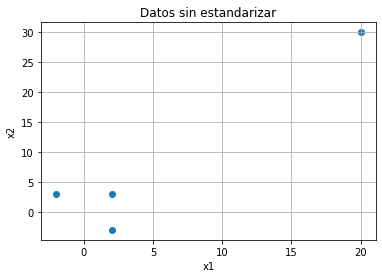

In [76]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Datos sin estandarizar')
plt.show()

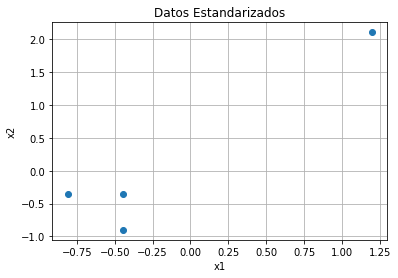

In [78]:
plt.figure(figsize=(6,4))
plt.scatter(x_std[:,0],x_std[:,1])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Datos Estandarizados')
plt.show()

In [79]:
df_x_std = pd.DataFrame(x_std)
df_x_std

,0,1
0,-0.444822,-0.353576
1,1.197597,2.110053
2,-0.809804,-0.353576
3,-0.444822,-0.901050


In [80]:
cd.pdistance_matrix(df_x_std, 'euclidean')

,0,1,2,3
0,0.000000,2.960914,0.364982,0.547473
1,2.960914,0.000000,3.177913,3.429909
2,0.364982,3.177913,0.000000,0.657981
3,0.547473,3.429909,0.657981,0.000000


### Canberra
$$\sum_i \frac{|u_i - v_i|}{|u_i| + |v_i|}$$

## Actividad 5

Calcular las distancias de similitud por:

1.- Distacia Jaccard (datos originales) datos estandarizados

2.- Distacia braycurtis (datos originales) datos estandarizados

3.- Manhatan (datos originales) datos estandarizados

4.- euclideana estandarizada  (datos originales)

ver si las matrices de similitud obtenidas cambian con respecto a los datos originales y los estandarizados

# 6 de octubre  Examen Módulo 1
# Organizarse por equipos para el proyecto

### Similitud por Coseno

La función de similitud del coseno es:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$ A $ y $ B $ representan los vectores y $ A_i $ o $ B_i $ representan el índice i de ese vector.
& Hay que tener en cuenta que si A y B son idénticos, se obtendrá $ cos (\theta) = 1 $.

* De lo contrario, si son totalmente opuestos, es decir, $ A = -B $, obtendría $ cos (\theta) = -1 $.
* Si obtiene $ cos (\ theta) = 0 $, eso significa que son ortogonales (o perpendiculares).
* Los números entre 0 y 1 indican una puntuación de similitud.
* Los números entre -1-0 indican una puntuación de disimilitud.

### Deducción

$$A\cdot B = ||A||||B||cos(\theta)$$

$$\frac{A\cdot B}{||A||||B||} = cos(\theta)= similaridad \in [-1,1]$$

$$d= 1 - similaridad = 1 - \frac{A\cdot B}{||A||||B||} \in \{0,2\}$$

In [81]:
def cosine_similarity(A,B):
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    
    return cos

In [82]:
A = np.array([1,5,7])
B = np.array([1,0,-8])
similaridad_cos = cosine_similarity(A,B)   # [-1,1]
similaridad_cos

-0.7877263614433762

In [83]:
def cosine_distance(A,B):
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    
    return 1-cos

In [84]:
A = np.array([1,5,7])
B = np.array([1,0,-8])
dist_cosine = cosine_distance(A,B)
dist_cosine

1.7877263614433763

In [86]:
AB = np.array([[1,5,7],
               [1,0,-8]])

In [87]:
sc.pdist(AB, 'cosine')

array([1.78772636])

In [89]:
cd.pdistance_matrix(pd.DataFrame(AB), 'cosine')

,0,1
0,0.000000,1.787726
1,1.787726,0.000000


In [90]:
x

array([[ 2,  3],
       [20, 30],
       [-2,  3],
       [ 2, -3]])

In [91]:
cd.pdistance_matrix(pd.DataFrame(x), 'cosine')

,0,1,2,3
0,0.000000,0.000000,0.615385,1.384615
1,0.000000,0.000000,0.615385,1.384615
2,0.615385,0.615385,0.000000,2.000000
3,1.384615,1.384615,2.000000,0.000000


In [92]:
cd.pdistance_matrix(pd.DataFrame(x), 'seuclidean')

,0,1,2,3
0,0.000000,2.584649,0.406138,0.406138
1,2.584649,0.000000,2.886156,2.886156
2,0.406138,2.886156,0.000000,0.574367
3,0.406138,2.886156,0.574367,0.000000


# ¿Qué pasa si mi dataset contiene todo tipo de datos?

# Datos Mixtos

Supongamos que sobre S muestras, representadas en la matriz $X$, se han observado simultáneamente diferentes muestras que por su naturaleza pueden corresponder a variables binarias,
cualitativas y cuantitativas. 

>La distancia entre individuos que presenten esta combinación de características puede ser medida a través de la similaridad de `Gower (1971)`. Esta similaridad es útil para tipos de datos mixtos.

La similaridad $\delta_{ijt}$ entre la $i$-ésima y la $j$-ésima muestra para la variable $t$, promediado sobre las $T$ variables o características, es la medida de similaridad propuesta por Grower (1971):

$$\delta_{ij}=\frac{1}{T} \delta_{ijt}$$

>En el caso de variables **binarias o cualitativas**, $\delta_{ijt}=1$ si $x_{it}=x_{jt}$ y $\delta_{ijt}=0$ si $x_{it}\neq x_{jt}$. 

>Si la variable es **cuantitativa** la similaridad entre los individuos estará dada por:

$$\delta_{ijt}=1-\frac{|x_{it} - x_{jt}|}{rt}$$

 donde $r_t$ es el rango (diferencia entre el máximo y el mínimo) de la $t$-ésima característica sobre toda la población. Si $x_{it}=x_{jt}$ entonces $\delta_{ijt}=1$, cuando $x_{it}$ y $x_{jt}$ se encuentan en los extremos de $r_t$ entonces $\delta_{ijt}=0$, y si $x_{it}$ y $x_{jt}$ son valores intermedios de $r_t$ entonces $0\leq \delta_{ijt} \leq 1$
 
 
 El tratamiento de los datos faltantes, la consideración de la ausencia simultánea de la característica, y la ponderación relativa de características, son debilidades metodológicas que afectan las medidas de similitud y distancias referidas hasta ahora para todo tipo de variables. 
 
 En este sentido, Gower introdujo en la expresión de la medida de similitud, ponderaciones denominadas $w_{ijt}$, como una función que
depende de cada par de datos $x_{it}$ y $x_{jt}$ , obteniendo la siguiente expresión general:

$$\delta_{ij} = \frac{\sum_{t=1}^T w_{ijt}\delta_{ijt}}{\sum_{t=1}^T w_{ijt}}$$

## Ejemplo:

In [93]:
df = pd.DataFrame([[1,2.6,'A'],
                   [12,5,'X'],
                   [4,5,'A']])
df.columns=['Num1','Num2','Num3']
df

,Num1,Num2,Num3
0,1,2.6,A
1,12,5.0,X
2,4,5.0,A



1. Encontrar la distancia Manhattan entre cada muestra para las variables numéricas
2. Normalizar la matriz de similitud

In [94]:
#calculando la medida de similitud y delta para Num1
dist_num_1 = sc.squareform(sc.pdist(df[['Num1']]), 'cityblock')
dist_num_1

array([[ 0., 11.,  3.],
       [11.,  0.,  8.],
       [ 3.,  8.,  0.]])

In [95]:
np.ptp(df['Num1'])

11

In [96]:
delta_1 = dist_num_1/max(np.ptp(df['Num1']),1)
delta_1

array([[0.        , 1.        , 0.27272727],
       [1.        , 0.        , 0.72727273],
       [0.27272727, 0.72727273, 0.        ]])

In [97]:
# Calculando la medida de similitud y delta para Num2
dist_num_2 = sc.squareform(sc.pdist(df[['Num2']], 'cityblock'))
dist_num_2

array([[0. , 2.4, 2.4],
       [2.4, 0. , 0. ],
       [2.4, 0. , 0. ]])

In [98]:
delta_2 = dist_num_2/max(np.ptp(df['Num2']),1)
delta_2

array([[0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

Calcular la distancia de similitud para las variables categóricas. 

1. Primero hay que convertir las variables categoricas nominales a variables dummies y después calcular las distancias de similitud (DICE)

In [100]:
dummy_df = pd.get_dummies(df['Num3'])
dummy_df

,A,X
0,1,0
1,0,1
2,1,0


In [102]:
delta_3 = sc.squareform(sc.pdist(dummy_df,'dice'))
delta_3

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

In [103]:
w1=w2=w3=1

In [104]:
#Distancia de similitud por Gower para datos Mixtos
gower_distance = (w1*delta_1 + w2*delta_2 + w3*delta_3)/(w1+w2+w3)
gower_distance

array([[0.        , 1.        , 0.42424242],
       [1.        , 0.        , 0.57575758],
       [0.42424242, 0.57575758, 0.        ]])

In [73]:
#!pip install gower

In [106]:
import gower

In [107]:
help(gower.gower_matrix)

Help on function gower_matrix in module gower.gower_dist:

gower_matrix(data_x, data_y=None, weight=None, cat_features=None)



In [108]:
df

,Num1,Num2,Num3
0,1,2.6,A
1,12,5.0,X
2,4,5.0,A


In [109]:
gower.gower_matrix(df)

array([[0.        , 1.        , 0.4242424 ],
       [1.        , 0.        , 0.57575756],
       [0.4242424 , 0.57575756, 0.        ]], dtype=float32)

In [110]:
gower_distance

array([[0.        , 1.        , 0.42424242],
       [1.        , 0.        , 0.57575758],
       [0.42424242, 0.57575758, 0.        ]])

## Ejemplo 2:

In [111]:
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}

data = pd.DataFrame(dictionary)
data

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


In [114]:
distance_gower = gower.gower_matrix(data)
similaridad_df = pd.DataFrame(distance_gower)

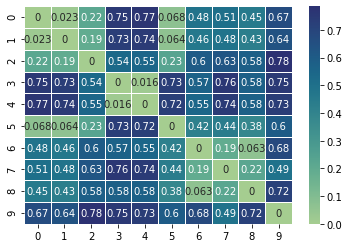

In [115]:
sns.heatmap(similaridad_df, annot=True, linewidth=.5,  cmap="crest");

In [116]:
new_cols = [f'Cliente_{c}' for c in range(0,len(data))]
new_cols

['Cliente_0',
 'Cliente_1',
 'Cliente_2',
 'Cliente_3',
 'Cliente_4',
 'Cliente_5',
 'Cliente_6',
 'Cliente_7',
 'Cliente_8',
 'Cliente_9']

In [118]:
similaridad_df = pd.DataFrame(distance_gower, index=new_cols, columns= new_cols)
similaridad_df

,Cliente_0,Cliente_1,Cliente_2,Cliente_3,Cliente_4,Cliente_5,Cliente_6,Cliente_7,Cliente_8,Cliente_9
Cliente_0,0.000000,0.023379,0.215121,0.750754,0.766968,0.067685,0.484729,0.508296,0.451357,0.666667
Cliente_1,0.023379,0.000000,0.191742,0.727376,0.743590,0.063537,0.461350,0.484917,0.427979,0.643288
Cliente_2,0.215121,0.191742,0.000000,0.535634,0.551848,0.230769,0.602941,0.626508,0.582391,0.784879
Cliente_3,0.750754,0.727376,0.535634,0.000000,0.016214,0.727187,0.567308,0.757541,0.578808,0.749246
Cliente_4,0.766968,0.743590,0.551848,0.016214,0.000000,0.723793,0.551094,0.741327,0.575415,0.733032
Cliente_5,0.067685,0.063537,0.230769,0.727187,0.723793,0.000000,0.417044,0.440611,0.383673,0.598982
Cliente_6,0.484729,0.461350,0.602941,0.567308,0.551094,0.417044,0.000000,0.190234,0.062783,0.681938
Cliente_7,0.508296,0.484917,0.626508,0.757541,0.741327,0.440611,0.190234,0.000000,0.223605,0.491704
Cliente_8,0.451357,0.427979,0.582391,0.578808,0.575415,0.383673,0.062783,0.223605,0.000000,0.715309
Cliente_9,0.666667,0.643288,0.784879,0.749246,0.733032,0.598982,0.681938,0.491704,0.715309,0.000000


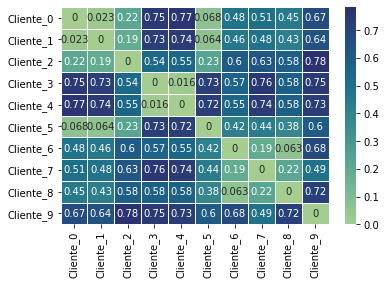

In [119]:
sns.heatmap(similaridad_df, annot=True, linewidth=.5,  cmap="crest");

Podemos interpretar la matriz de la siguiente manera. En la primera columna, vemos la diferencia del primer cliente con todos los demás. Este cliente es similar al segundo, tercer y sexto cliente.

### ¿Cuál es el cliente que más se parece al cliente 6?

In [121]:
similaridad_df['Cliente_6'].sort_values()

Cliente_6    0.000000
Cliente_8    0.062783
Cliente_7    0.190234
Cliente_5    0.417044
Cliente_1    0.461350
Cliente_0    0.484729
Cliente_4    0.551094
Cliente_3    0.567308
Cliente_2    0.602941
Cliente_9    0.681938
Name: Cliente_6, dtype: float32

In [123]:
pd.DataFrame(similaridad_df['Cliente_6'].sort_values()).iloc[1,:]

Cliente_6    0.062783
Name: Cliente_8, dtype: float32

## Actividad (Ejercicio tipo examen)

Considere los datos sobre los ratings de personas que han asistido a diferentes restaurantes en el dataset **"restaurant_ratings"** y realice lo que se le pide:

> Generar un reporte de calidad de datos del dataset. Realice un filtro para las columnas  `'userID','placeID' y 'food_rating'`.

> Genere un nuevo DataFrame con la interacción entre los usuarios y los restaurantes (el índice del dataframe deberá contener los ids de los usuarios, y las columnas seran los ids de los restaurantes, la interacción entre filas y columnas serán los valores de 'food_rating'). **Hint:** investigue el método **pandas.DataFrame.pivot**.

> Calcule la similitud que existe entre los usuarios basados en el rating dado para cada restaurante (i.e., Obtenga la matriz de similitud entre usuarios).

> Cree un recomendador de restaurantes: dada la matriz de similitud, escoger al usuario `'U1003'` y recomendar el top 3 de restaurantes que podrían gustarle. **Hint:** Seleccione al usuario más similar y recomiende los restaurantes que el usuario `'U1003'` no ha visitado pero que el usuario más similar si (i.e, los restaurantes que el usuario más similar a calificado).
